

---



---


#KNN Classifier


---



---
 K-nearest neighbors (KNN) classification algorithm
Given a new data point, it predicts the label based on the majority class among its k nearest neighbors in the feature space.

Mathematically, The prediction ŷ for a new instance x is determined by:

ŷ = argmaxⱼ Σᵢ₌₁ᵏ wᵢ ⋅ I(yᵢ = j)

where:
- k is the number of nearest neighbors,
- xᵢ are the instances in the training dataset closest to x,
- yᵢ are the corresponding labels,
- I(⋅) is the indicator function (1 if the condition is true, 0 otherwise),
- wᵢ is the weight assigned to the i-th nearest neighbor (usually uniform or based on distance).


In this notebook, we explore the MNIST dataset, initially training a K-nearest neighbors (KNN) classifier. We then enhance its performance through hyperparameter tuning and data augmentation techniques, improving accuracy and robustness. Through visualizations, we evaluate the effects of these enhancements and examine the model's predictions for ambiguous digits.

#Importing Dataset

In [ ]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

# Print the keys of the dataset
print(mnist.keys())

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [ ]:
X, y = mnist["data"], mnist["target"]

# Print the shape of the feature matrix (X)
print(X.shape)

(70000, 784)


In [ ]:
# Convert the entire y array to unsigned integers
y = y.astype(np.uint8)

#Splitting Data into Training and Testing Sets

Lets split the data and specify a specific size for our testing dataset and to ensure that all classes are present in our data we can stratify the sampling using our target column

In [ ]:
from sklearn.model_selection import train_test_split

# Split the MNIST dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42, stratify=y)

#Setup KNeighborsClassifier model

The `KNeighborsClassifier` is a part of scikit-learn's neighbors module and is used for k-nearest neighbors classification. It classifies samples based on the mode of the 'k' nearest samples in the feature space.

For more information, visit the [`KNeighborsClassifier documentation`](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html).


In [ ]:
# Importing the KNeighborsClassifier class from scikit-learn's neighbors module
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier instance with the following parameters:
# - 'weights' set to 'distance' to give closer neighbors more influence on the prediction
# - 'n_neighbors' set to 4, specifying the number of neighbors to consider for classification
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)

# Fitting the KNeighborsClassifier model to the training data (X_train and y_train)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [ ]:
# Predicting labels for the test data (X_test) using the trained KNeighborsClassifier model (knn_clf)
y_knn_pred = knn_clf.predict(X_test)

#Accuracy Calculation Using accuracy_score Function

In [ ]:
# Importing the accuracy_score function from scikit-learn's metrics module
from sklearn.metrics import accuracy_score

# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_knn_pred)
accuracy = accuracy_score(y_test, y_knn_pred)

# Displaying the accuracy score
accuracy

0.9759

In [ ]:
some_digit = X[5]

In [ ]:
# Define a function to plot a digit
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap=mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

#Prediction of Probabilities for an Ambiguous Digit Using K-nearest Neighbors Classifier

In [ ]:
# Selecting an ambiguous digit from the test data (X_test)
ambiguous_digit = X_test[250]

# Predicting the probabilities of each class for the ambiguous digit using the trained K-nearest neighbors classifier (knn_clf)
probabilities = knn_clf.predict_proba([ambiguous_digit])

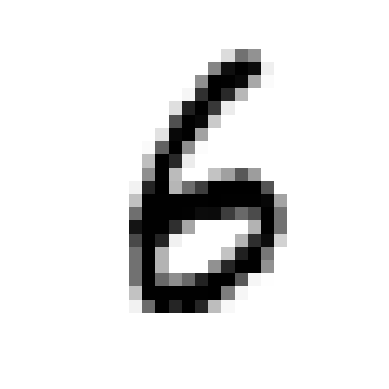

In [ ]:
# Assuming you have a function named plot_digit to visualize the digit
plot_digit(ambiguous_digit)

# Multilabel Classification

In [ ]:
# Create two binary labels for each digit: one indicating whether the digit is large (7, 8, or 9) and another indicating whether it is odd
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1)

# Combine the binary labels into a multilabel array
y_multilabel = np.c_[y_train_large, y_train_odd]

# Instantiate and train a K-nearest neighbors classifier on the training data and multilabel array
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)


KNeighborsClassifier()

In [ ]:
# Predict the binary labels for a new digit using the trained K-nearest neighbors classifier
knn_clf.predict([some_digit])


array([[False, False]])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
# Use cross-validation to predict the labels for the training data and compute the F1 score
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_multilabel, cv=3)

# Compute the F1 score using macro averaging
f1_score(y_multilabel, y_train_knn_pred, average="macro")


0.9770714128542544

#Exercise
##1. How would you modify the architecture or hyperparameters of the MNIST classifier to achieve an accuracy of over 97%?

Hyperparameter tuning is the process of selecting the set of optimal parameters for a machine learning model to maximize its performance. This involves adjusting parameters that govern the model's learning process, which are not learned from the data but set prior to the training.

`GridSearchCV` in scikit-learn is a powerful tool for hyperparameter tuning. It performs exhaustive search over a specified parameter grid for a model, evaluating and comparing the model's performance with each combination of parameters using cross-validation.

The process helps identify the combination of parameters that yields the best model performance, ensuring that the model is well-optimized for the given task.

For more information on hyperparameter tuning and `GridSearchCV`, visit the [GridSearchCV documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).



Using Hyperparameter Tuning Using GridSearchCV with K-nearest Neighbors Classifier

In [ ]:
# Importing GridSearchCV from scikit-learn's model_selection module
from sklearn.model_selection import GridSearchCV

# Defining the parameter grid for hyperparameter tuning
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

# Creating a K-nearest neighbors classifier instance
knn_clf = KNeighborsClassifier()

# Performing grid search with cross-validation to find the best combination of hyperparameters
grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)

# Fitting the grid search object to the training data to identify the optimal hyperparameters
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  32.5s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.973 total time=  30.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  31.1s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  31.7s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.968 total time=  31.0s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.974 total time=  31.6s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.975 total time=  30.5s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.974 total time=  30.4s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  31.5s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.969 total time=  30.5s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.970 total time=  31.2s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5],
                          'weights': ['uniform', 'distance']}],
             verbose=3)

In [ ]:
# Retrieving the best hyperparameters found by the grid search
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [ ]:
# Retrieving the best mean cross-validated score achieved during the grid search
grid_search.best_score_

0.9729833333333333

In [ ]:

# Predicting labels for the test data (X_test) using the best estimator found by the grid search (grid_search)
y_pred = grid_search.predict(X_test)

# Calculating the accuracy score by comparing the true labels (y_test) with the predicted labels (y_pred)
accuracy_score(y_test, y_pred)

0.9759